In [ ]:
import pandas as pd
import re
import json
import requests
import urllib
import subprocess
import argparse
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
%matplotlib inline
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")
pca = SparsePCA(100, random_state = 1)
from nltk.corpus import stopwords
import glob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from spacy.lang.en import English
parser = English()

In [ ]:
!pwd

/content


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataframe.csv to dataframe (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataframe.csv']))

In [ ]:
df.head()



,text,label
0,बहुत ही निराशाजनक अनुभव था हमारा,sad
1,बैंगलोर में कोई भी होटल बुक कर दो,neutral
2,कैब ड्राइवर ने मुझे गाली दी,sad
3,आज तो काफी अच्छा ऑफर चल रहे,happy
4,क्या बताओ यार मूड ही ख़राब है,angry


In [ ]:
def emotion(x):
    if x == 'sad':
        return 0
    if x == 'happy':
        return 1
    if x == 'neutral':
        return 2
    if x == 'angry':
        return 3
           

In [ ]:
df['label']=df['label'].apply(emotion) 


In [ ]:
df.head(10)

,text,label
0,बहुत ही निराशाजनक अनुभव था हमारा,0
1,बैंगलोर में कोई भी होटल बुक कर दो,2
2,कैब ड्राइवर ने मुझे गाली दी,0
3,आज तो काफी अच्छा ऑफर चल रहे,1
4,क्या बताओ यार मूड ही ख़राब है,3
5,अरे ये चैनल कैसे लॉक हो गया गधे,3
6,जल्दी से एक काम करना,2
7,वाह भाई क्या बढ़िया डील मिली है,1
8,शिट यार फिर से चैनल्स बंद हो गए,0
9,ये चैनल्स का रेट इतना ज्यादा क्यों कर देते है ...,3


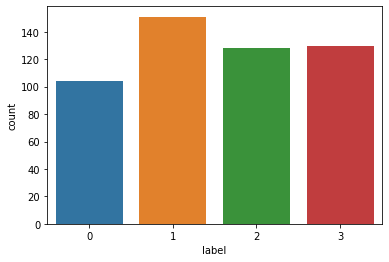

In [ ]:
sns.countplot(df['label'])

In [ ]:
!pip install torch==1.3.1+cpu -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!pip install inltk

In [ ]:
from inltk.inltk import setup
setup('hi')

We'll only do this for the first time.
We'll only do this for the first time.
Done!


In [ ]:
df['text'].iloc[0]

['बहुत', 'ही', 'निराशाजनक', 'अनुभव', 'था', 'हमारा']

In [ ]:
df['text'].head()

0    बहुत ही निराशाजनक अनुभव था हमारा 
1    बैंगलोर में कोई भी होटल बुक कर दो
2         कैब ड्राइवर ने मुझे गाली दी 
3         आज तो काफी अच्छा ऑफर चल रहे 
4        क्या बताओ यार मूड ही ख़राब है 
Name: text, dtype: object

In [ ]:
#df.head()

In [ ]:
 ######## Get Sentence Encoding ################
from inltk.inltk import get_sentence_encoding

vec1 = []

for i in range(df.shape[0]):
  vectors = get_sentence_encoding(df.iloc[i, 0], "hi")
  vec1.append(vectors)


In [ ]:
len(vec1[0])

400

In [ ]:
vec1[0][0]

0.28819293

In [ ]:
len(vec[0])

23

In [ ]:
#new_vec = []
#for i in range(len(vec)):
  #new_vec.append(sum(vec[i])/len(vec[i]))
  #Average of the 1st embeding of every word of 1st sentence
  #likewise done for all 400 embedings
  # same process is repeated for 513 sentences. 

In [ ]:
len(new_vec[0])

400

In [ ]:
len(sum(vec[0]))

400

In [ ]:
len(vec[0])

7

In [ ]:
index

465

In [ ]:
len(vec[1][19])

400

In [ ]:
########### DF_new ############
df_new = pd.DataFrame(vec1)

In [ ]:
df_new.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,0.288193,-0.134246,0.086000,-0.304407,0.160364,0.159911,0.227541,-0.055328,0.070942,0.298604,-0.114985,0.523500,0.005419,-0.120590,-0.110383,0.000319,0.048052,-0.110146,-0.049384,-0.585980,0.125783,-0.094846,0.145695,0.370351,-0.016760,-0.123871,-0.074530,0.223705,-0.135250,0.524466,-0.130477,0.210483,-0.021186,0.039055,-0.132363,0.547144,0.015149,0.130037,-0.044384,0.077128,...,0.357026,0.152118,-0.007999,-0.167035,0.010618,0.048120,0.095695,0.115379,0.141189,-0.284258,-0.053615,0.163587,0.324238,0.025192,0.109205,-0.098250,-0.006752,-0.021583,0.179833,-0.070536,-0.001041,-0.015652,-0.214162,0.098761,-0.074401,-0.165384,-0.015499,0.105697,0.076486,-0.598068,0.056038,0.169693,-0.344759,-0.221273,0.047750,-0.154743,-0.070090,-0.317192,0.008722,-0.031493
1,-0.134930,-0.279349,-0.315680,0.022347,-0.298410,-0.039591,0.143285,-0.115014,-0.179911,0.064375,0.007928,-0.181011,0.004737,0.110999,-0.420399,0.001277,0.133557,-0.000760,0.000021,-0.105583,0.019347,-0.133839,0.077672,-0.260262,0.030446,0.192336,0.120274,-0.073716,-0.170223,0.241432,0.077299,-0.392415,0.189134,0.023241,-0.346625,0.314090,-0.012803,0.268874,-0.136655,-0.018279,...,0.099851,-0.044247,-0.504208,-0.088543,-0.025247,0.127896,0.122132,0.141686,0.169333,-0.214174,0.126503,0.120941,-0.076877,-0.344408,-0.300692,-0.031121,-0.218801,0.086216,0.132382,0.095430,-0.035991,0.380901,-0.209617,0.070596,-0.007657,-0.051856,-0.060833,-0.181722,0.170450,-0.006535,0.066197,0.172240,-0.151939,0.409699,0.133911,0.251165,-0.023993,-0.173742,-0.247601,-0.037194
2,-0.077214,-0.028732,-0.031750,0.041892,0.119714,-0.017455,0.034502,-0.009999,0.002673,0.166930,0.038295,-0.234633,0.001091,-0.096745,0.027132,0.105528,0.366626,0.125873,-0.048768,-0.134524,0.014690,0.105190,-0.026640,0.052390,-0.101332,-0.148067,0.570039,0.389424,-0.027984,0.165561,-0.104282,0.130361,0.086842,-0.002621,0.046111,-0.008927,-0.102033,0.079925,-0.083637,0.020668,...,-0.130892,-0.047753,-0.025361,0.030576,-0.000736,0.088561,0.061978,0.142603,0.031096,0.093109,-0.014217,-0.031647,-0.189068,0.006456,-0.051976,0.015145,0.089608,0.010115,-0.132675,0.070349,0.001501,-0.074927,0.023551,0.008157,0.024548,-0.047584,0.062534,-0.047674,0.058239,0.007272,-0.010486,0.196299,0.008428,0.138905,-0.001326,-0.017811,-0.090564,-0.046846,-0.021360,-0.014862
3,-0.114845,-0.031501,-0.003702,-0.001637,-0.038807,-0.032960,-0.042745,-0.034360,-0.033968,0.079559,-0.089236,0.016025,0.013384,-0.061240,-0.026353,-0.016759,0.091424,0.012121,-0.108483,-0.076165,0.237624,0.091833,0.021658,-0.112332,-0.086679,0.044731,0.059415,-0.094533,-0.158559,0.218913,-0.175287,-0.068025,0.021572,-0.150617,0.244461,0.002007,-0.085947,0.272281,0.337055,-0.011528,...,0.216995,-0.421609,0.087230,0.036195,0.073476,-0.042402,-0.004250,0.144919,-0.218466,0.385266,-0.087942,-0.286759,-0.154966,0.192806,-0.353175,-0.135085,0.075347,0.004225,0.105172,-0.048442,-0.200992,0.102093,-0.022224,0.081330,-0.011908,-0.015254,-0.011526,0.057766,-0.007862,-0.222330,-0.297865,-0.222571,-0.024050,0.064566,-0.014808,-0.086957,-0.006814,-0.014100,-0.095185,-0.364842
4,-0.029330,-0.065885,-0.264370,-0.088499,0.031004,-0.002601,0.124446,-0.049036,0.052985,0.169486,0.017373,0.061772,-0.013589,-0.121344,0.024133,-0.028520,0.048615,0.094754,0.074415,-0.207325,0.095892,0.122528,-0.008103,0.074566,0.040976,-0.124200,0.125382,0.233325,0.272772,0.035257,-0.139561,0.263510,0.307018,0.002367,-0.035384,-0.101211,-0.052986,-0.115326,-0.063477,0.123072,...,0.035741,-0.206961,-0.011195,-0.051999,0.121556,-0.008167,-0.099081,0.350542,0.316892,0.192838,0.020307,-0.307982,0.337866,-0.033224,0.000027,0.075252,0.481567,-0.013328,0.372287,-0.259278,-0.002475,-0.021274,-0.031126,0.039944,-0.081606,-0.031231,-0.080335,-0.077382,0

In [ ]:
y = df['label'] 

In [ ]:
df_final = pd.concat([df_new,y],axis=1)


In [ ]:
df_final.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,label
0,0.288193,-0.134246,0.086000,-0.304407,0.160364,0.159911,0.227541,-0.055328,0.070942,0.298604,-0.114985,0.523500,0.005419,-0.120590,-0.110383,0.000319,0.048052,-0.110146,-0.049384,-0.585980,0.125783,-0.094846,0.145695,0.370351,-0.016760,-0.123871,-0.074530,0.223705,-0.135250,0.524466,-0.130477,0.210483,-0.021186,0.039055,-0.132363,0.547144,0.015149,0.130037,-0.044384,0.077128,...,0.152118,-0.007999,-0.167035,0.010618,0.048120,0.095695,0.115379,0.141189,-0.284258,-0.053615,0.163587,0.324238,0.025192,0.109205,-0.098250,-0.006752,-0.021583,0.179833,-0.070536,-0.001041,-0.015652,-0.214162,0.098761,-0.074401,-0.165384,-0.015499,0.105697,0.076486,-0.598068,0.056038,0.169693,-0.344759,-0.221273,0.047750,-0.154743,-0.070090,-0.317192,0.008722,-0.031493,0
1,-0.134930,-0.279349,-0.315680,0.022347,-0.298410,-0.039591,0.143285,-0.115014,-0.179911,0.064375,0.007928,-0.181011,0.004737,0.110999,-0.420399,0.001277,0.133557,-0.000760,0.000021,-0.105583,0.019347,-0.133839,0.077672,-0.260262,0.030446,0.192336,0.120274,-0.073716,-0.170223,0.241432,0.077299,-0.392415,0.189134,0.023241,-0.346625,0.314090,-0.012803,0.268874,-0.136655,-0.018279,...,-0.044247,-0.504208,-0.088543,-0.025247,0.127896,0.122132,0.141686,0.169333,-0.214174,0.126503,0.120941,-0.076877,-0.344408,-0.300692,-0.031121,-0.218801,0.086216,0.132382,0.095430,-0.035991,0.380901,-0.209617,0.070596,-0.007657,-0.051856,-0.060833,-0.181722,0.170450,-0.006535,0.066197,0.172240,-0.151939,0.409699,0.133911,0.251165,-0.023993,-0.173742,-0.247601,-0.037194,2
2,-0.077214,-0.028732,-0.031750,0.041892,0.119714,-0.017455,0.034502,-0.009999,0.002673,0.166930,0.038295,-0.234633,0.001091,-0.096745,0.027132,0.105528,0.366626,0.125873,-0.048768,-0.134524,0.014690,0.105190,-0.026640,0.052390,-0.101332,-0.148067,0.570039,0.389424,-0.027984,0.165561,-0.104282,0.130361,0.086842,-0.002621,0.046111,-0.008927,-0.102033,0.079925,-0.083637,0.020668,...,-0.047753,-0.025361,0.030576,-0.000736,0.088561,0.061978,0.142603,0.031096,0.093109,-0.014217,-0.031647,-0.189068,0.006456,-0.051976,0.015145,0.089608,0.010115,-0.132675,0.070349,0.001501,-0.074927,0.023551,0.008157,0.024548,-0.047584,0.062534,-0.047674,0.058239,0.007272,-0.010486,0.196299,0.008428,0.138905,-0.001326,-0.017811,-0.090564,-0.046846,-0.021360,-0.014862,0
3,-0.114845,-0.031501,-0.003702,-0.001637,-0.038807,-0.032960,-0.042745,-0.034360,-0.033968,0.079559,-0.089236,0.016025,0.013384,-0.061240,-0.026353,-0.016759,0.091424,0.012121,-0.108483,-0.076165,0.237624,0.091833,0.021658,-0.112332,-0.086679,0.044731,0.059415,-0.094533,-0.158559,0.218913,-0.175287,-0.068025,0.021572,-0.150617,0.244461,0.002007,-0.085947,0.272281,0.337055,-0.011528,...,-0.421609,0.087230,0.036195,0.073476,-0.042402,-0.004250,0.144919,-0.218466,0.385266,-0.087942,-0.286759,-0.154966,0.192806,-0.353175,-0.135085,0.075347,0.004225,0.105172,-0.048442,-0.200992,0.102093,-0.022224,0.081330,-0.011908,-0.015254,-0.011526,0.057766,-0.007862,-0.222330,-0.297865,-0.222571,-0.024050,0.064566,-0.014808,-0.086957,-0.006814,-0.014100,-0.095185,-0.364842,1
4,-0.029330,-0.065885,-0.264370,-0.088499,0.031004,-0.002601,0.124446,-0.049036,0.052985,0.169486,0.017373,0.061772,-0.013589,-0.121344,0.024133,-0.028520,0.048615,0.094754,0.074415,-0.207325,0.095892,0.122528,-0.008103,0.074566,0.040976,-0.124200,0.125382,0.233325,0.272772,0.035257,-0.139561,0.263510,0.307018,0.002367,-0.035384,-0.101211,-0.052986,-0.115326,-0.063477,0.123072,...,-0.206961,-0.011195,-0.051999,0.121556,-0.008167,-0.099081,0.350542,0.316892,0.192838,0.020307,-0.307982,0.337866,-0.033224,0.000027,0.075252,0.481567,-0.013328,0.372287,-0.259278,-0.002475,-0.021274,-0.031126,0.039944,-0.081606,-0.031231,-0.080335,-0.077382,0.061706,-0.479662,0.000595,-0.268464

In [ ]:
#y_train

In [ ]:
train_X = df_new[:470]
test_X = df_new[470:]

In [ ]:
train_X[0]


0      0.288193
1     -0.134930
2     -0.077214
3     -0.114845
4     -0.029330
         ...   
465   -0.063386
466   -0.429972
467   -0.012002
468   -0.107558
469    0.059594
Name: 0, Length: 470, dtype: float64

In [ ]:
######### Train_test_Split #############
from sklearn.model_selection import train_test_split


In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df_new, y,stratify=y,  
                                                          random_state=3, 
                                                          test_size=0.3)
# print shapes
(len(xtrain))
(len(xvalid))
(len(ytrain))
(len(yvalid))



154

In [ ]:
################### Random Forest #################
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_depth= 2).fit(xtrain, ytrain)


In [ ]:
prediction_train = rf.predict(xtrain)
prediction_test = rf.predict(xvalid)

from sklearn.metrics import classification_report



In [ ]:
print(classification_report(ytrain,prediction_train))

              precision    recall  f1-score   support

           0       0.88      0.51      0.64        73
           1       0.61      0.93      0.74       106
           2       0.77      0.71      0.74        89
           3       0.82      0.65      0.72        91

    accuracy                           0.72       359
   macro avg       0.77      0.70      0.71       359
weighted avg       0.76      0.72      0.71       359



In [ ]:
print(classification_report(yvalid,prediction_test))


              precision    recall  f1-score   support

           0       0.58      0.23      0.33        31
           1       0.46      0.82      0.59        45
           2       0.61      0.51      0.56        39
           3       0.52      0.38      0.44        39

    accuracy                           0.51       154
   macro avg       0.54      0.49      0.48       154
weighted avg       0.54      0.51      0.49       154



In [ ]:
 ############ XGB ###################
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xg_reg = xgb.XGBClassifier(subsample=0.4,colsample_bytree = 0.4, learning_rate = 0.01,
                max_depth = 2, n_estimators = 100)

In [ ]:
xg_reg.fit(xtrain,ytrain)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)

In [ ]:
xtrain.shape

(329, 400)

In [ ]:
xvalid.shape

(141, 400)

In [ ]:
prediction_train = xg_reg.predict(xtrain)
prediction_test = xg_reg.predict(xvalid)
print(classification_report(ytrain,prediction_train))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        73
           1       0.87      0.92      0.89       106
           2       0.85      0.88      0.86        89
           3       0.90      0.87      0.88        91

    accuracy                           0.86       359
   macro avg       0.86      0.86      0.86       359
weighted avg       0.86      0.86      0.86       359



In [ ]:
print(classification_report(yvalid,prediction_test))


              precision    recall  f1-score   support

           0       0.62      0.48      0.55        31
           1       0.59      0.67      0.62        45
           2       0.66      0.79      0.72        39
           3       0.50      0.41      0.45        39

    accuracy                           0.60       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.59      0.60      0.59       154



In [ ]:
############ Hyperparameter tuning in XBG ################

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# tuning max_depth and min_child_weight
param_test1 = {
 'max_depth':range(1,5,1),
 'min_child_weight':range(1,5,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=100,
  gamma=0, subsample=0.4, colsample_bytree=0.4,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_mean_absolute_error',n_jobs=4,iid=False, cv=3)

gsearch1.fit(xtrain,ytrain)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 4, 'min_child_weight': 3}, -0.751984126984127)

In [ ]:
# tuning gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=100, max_depth=4,
 min_child_weight=3, subsample=0.8, colsample_bytree=0.8,#### cheeck if 1 or 3#################
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=4,iid=False, cv=3)

gsearch2.fit(xtrain,ytrain)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, -0.8298085901027078)

In [ ]:
param_test3 = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=100, max_depth=4,
 min_child_weight=3, gamma=0,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='neg_mean_absolute_error',n_jobs=4,iid=False, cv=3)

gsearch3.fit(xtrain,ytrain)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.7}, -0.8076797385620914)

In [ ]:
########### INcreasing n_estimators and decresing learning rate       ###########

In [ ]:
xg_reg =  xgb.XGBClassifier(subsample=0.7,colsample_bytree = 0.9, learning_rate = 0.01,
                max_depth = 4,min_child_weight=3,gamma=0, n_estimators = 100)

In [ ]:
xg_reg.fit(xtrain,ytrain)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [ ]:
prediction_train = xg_reg.predict(xtrain)
prediction_test = xg_reg.predict(xvalid)
print(classification_report(ytrain,prediction_train))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        73
           1       0.84      0.89      0.86       106
           2       0.89      0.80      0.84        89
           3       0.86      0.87      0.86        91

    accuracy                           0.84       359
   macro avg       0.84      0.83      0.83       359
weighted avg       0.84      0.84      0.84       359



In [ ]:
print(classification_report(yvalid,prediction_test))


              precision    recall  f1-score   support

           0       0.67      0.45      0.54        31
           1       0.60      0.73      0.66        45
           2       0.66      0.69      0.68        39
           3       0.57      0.54      0.55        39

    accuracy                           0.62       154
   macro avg       0.62      0.60      0.61       154
weighted avg       0.62      0.62      0.61       154



In [ ]:
# Applying Deep Learning

In [ ]:
from keras.models import Sequential
import keras
from keras.layers import Dense
from keras.layers import Flatten,Dropout,BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ReduceLROnPlateau

In [ ]:
type(ytrain)

pandas.core.series.Series

In [ ]:
train_X = np.array(xtrain)
test_X = np.array(xvalid)

In [ ]:
train_X.shape

(359, 400)

In [ ]:
num_classes = 4

# Input image 0dimensions
input_shape = (400,)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(ytrain, num_classes)
y_test_binary = keras.utils.to_categorical(yvalid, num_classes)

In [ ]:
y_train_binary.shape

(359, 4)

In [ ]:
train_X = train_X.reshape(train_X.shape[0], 400, 1)
test_X = test_X.reshape(test_X.shape[0], 400, 1)

In [ ]:
test_X.shape

NameError: ignored

In [ ]:
################## Using CONV1D ###################
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(400,1)))
#model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(patience = 2,verbose =1)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 400, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 200, 32)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 200, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               1600250   
_________________________________________________________________
dropout_6 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                

In [ ]:
model.fit(train_X, y_train_binary, validation_data=(test_X, y_test_binary), epochs=25, batch_size=128, verbose=1,callbacks =[reduce_lr])
# Final evaluation of the model
scores = model.evaluate(test_X, y_test_binary, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 359 samples, validate on 154 samples
Epoch 1/25
359/359 [==============================] - 1s 2ms/step - loss: 1.3906 - acc: 0.2535 - val_loss: 1.3130 - val_acc: 0.2597
Epoch 2/25
359/359 [==============================] - 0s 751us/step - loss: 1.2548 - acc: 0.4763 - val_loss: 1.2268 - val_acc: 0.4805
Epoch 3/25
359/359 [==============================] - 0s 688us/step - loss: 1.1422 - acc: 0.5655 - val_loss: 1.1555 - val_acc: 0.4610
Epoch 4/25
359/359 [==============================] - 0s 699us/step - loss: 1.0485 - acc: 0.6045 - val_loss: 1.1020 - val_acc: 0.5065
Epoch 5/25
359/359 [==============================] - 0s 752us/step - loss: 0.9428 - acc: 0.6936 - val_loss: 1.0579 - val_acc: 0.5390
Epoch 6/25
359/359 [==============================] - 0s 740us/step - loss: 0.8839 - acc: 0.6936 - val_loss: 1.0078 - val_acc: 0.5909
Epoch 7/25
359/359 [==============================] - 0s 717us/step - loss: 0.8089 - acc: 0.7409 - val_loss: 0.9839 - val_acc: 0.5584
Epoch 8/25
359/359